In [1]:
# libs
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import xarray as xr
import glob
import os
import numpy as np
import pandas as pd
from pyproj import CRS, Transformer
import matplotlib as mpl

In [2]:
wrf_path = '/glade/derecho/scratch/jhenao/atm746/ar_mp9_bl1/'



file = sorted(glob.glob(wrf_path+"wrfout_d02*"))[10]
# open netcdf files
ds = xr.open_dataset(
    file
)


In [3]:
# add convective and parameterized precip and get it in the station coords
lat = ds['XLAT'].squeeze()
lon = ds['XLONG'].squeeze()
hgt = ds['HGT'].squeeze()

In [6]:
hgt

<xarray.DataArray 'HGT' (south_north: 324, west_east: 282)> Size: 365kB
[91368 values with dtype=float32]
Coordinates:
    XLAT     (south_north, west_east) float32 365kB ...
    XLONG    (south_north, west_east) float32 365kB ...
    XTIME    datetime64[ns] 8B ...
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Terrain Height
    units:        m
    stagger:

In [7]:
# geopotential from WRF
geopotential = ds['PHB'].squeeze() +\
               ds['PH'].squeeze()


In [9]:
geopotential.dims

('bottom_top_stag', 'south_north', 'west_east')

In [10]:
# it is staggered on the vertical

In [11]:
geopotential.shape

(48, 324, 282)

In [31]:
# compute geopotential height dividing by g
# subtract terrain hgt to have height with respect to the surface
geoheight = geopotential / 9.81 - hgt


# unstagger vertically
geoheight_unstag = (geoheight[1:,:] + geoheight[:-1,:]) / 2.

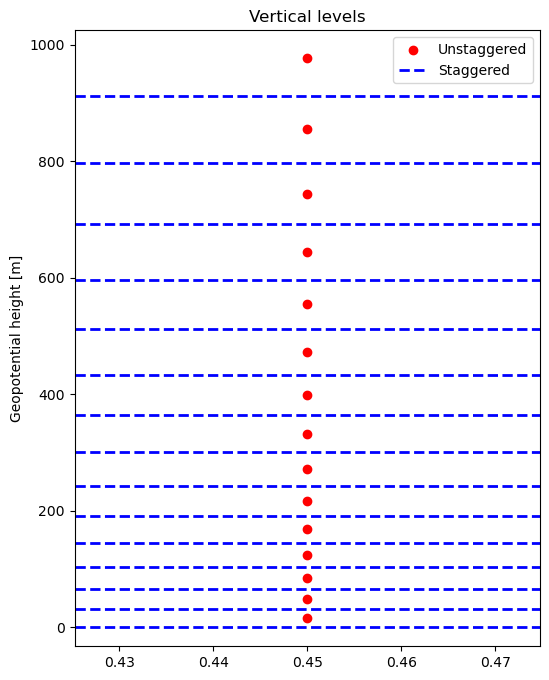

In [39]:
# plot at any point

iy = 60
ix = 60

y_stag = geoheight_unstag[0:15,iy,ix]
x = [0.45]*len(y_stag)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))


ax.scatter(x,y_stag, c='r', label="Unstaggered")

for i, val in enumerate(geoheight[0:15, iy, ix]):
    if i == 0:
        ax.axhline(y=val, linewidth=2, color='b', linestyle='--', label='Staggered')
    else:
        ax.axhline(y=val, linewidth=2, color='b', linestyle='--')

ax.set_title('Vertical levels')
ax.set_ylabel('Geopotential height [m]')
ax.legend(loc='upper right')
plt.show()